This notebook will help you get started solving the given problem. In this challenge, we have to predict the attack type. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 1000)

In [2]:
train = pd.read_csv('../Data/train_data.csv')
test = pd.read_csv('../Data/test_data.csv')

In [3]:
print('The train data has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('The test data has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

The train data has 169307 rows and 43 columns
The test data has 91166 rows and 42 columns


In [4]:
## check target class
train['target'].value_counts(normalize=True)

0    0.583957
2    0.217676
1    0.198367
Name: target, dtype: float64

In [5]:
#print(train.corr()['target'])

There aren't any missing values. Let's jump to building models to get some baseline score.

In [6]:
## check missing values
#train.isnull().sum(axis=0) ## there are no missing values.

# Preprocessing after Visualization

In [7]:
#Drop 'cat_4','cat_5','cat_6','cat_7','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18' columns
train=train.drop(['cat_4','cat_5','cat_6','cat_7','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18'],1)
test=test.drop(['cat_4','cat_5','cat_6','cat_7','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18'],1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scale=MinMaxScaler()
li=[]
for i in train.columns:
    if 'cont' in i:
        li.append(i)
# scaled_train_data=scale.fit_transform(train[li])
# scaled_test_data=scale.fit_transform(test[li])

In [10]:
# scaled_train_data=pd.DataFrame(scaled_train_data,columns=li)
# scaled_test_data=pd.DataFrame(scaled_test_data,columns=li)
# print(scaled_train_data.shape,scaled_test_data.shape)

In [11]:
print(li)

['cont_1', 'cont_2', 'cont_3', 'cont_4', 'cont_5', 'cont_6', 'cont_7', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cont_15', 'cont_16', 'cont_17', 'cont_18']


In [12]:
# for i in li:
#     train[i]=scaled_train_data[i].values
#     test[i]=scaled_test_data[i].values

In [13]:
plt.figure(figsize=(10,7))

In [14]:
import seaborn as sns

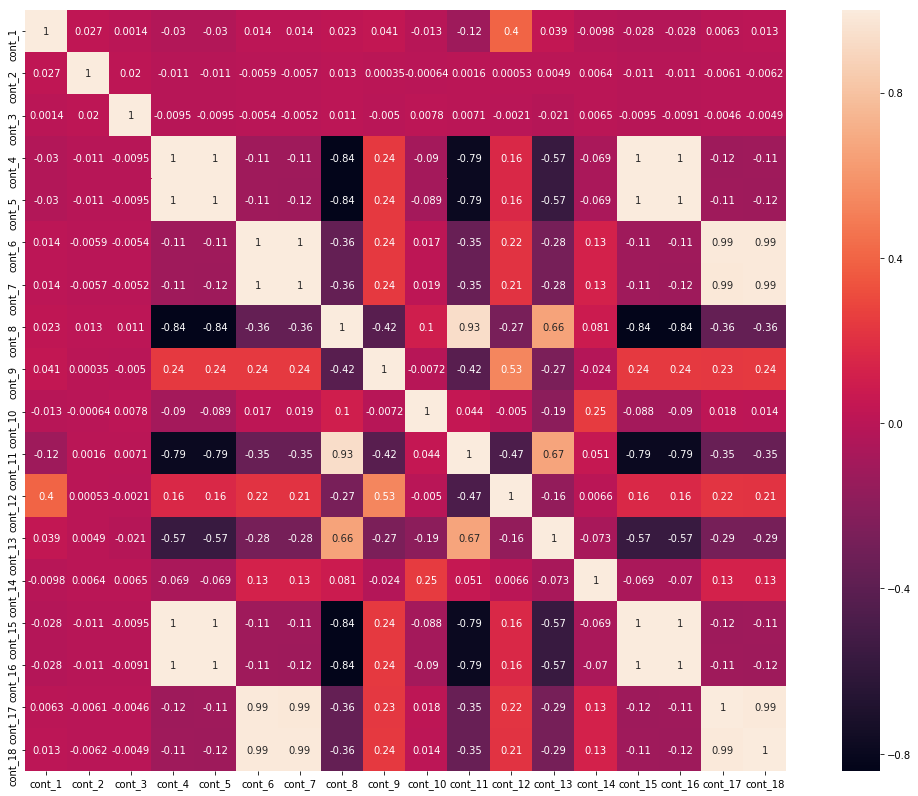

In [15]:
plt.figure(figsize=(20,14))
sns.heatmap(data=train[li].corr(),annot=True, square=True)
plt.show()

In [16]:
train['cont_4_5_max']=[max(i,j) for i,j in zip(train['cont_4'],train['cont_5'])]
train['cont_6_7_min']=[min(i,j) for i,j in zip(train['cont_6'],train['cont_7'])]
train['cont_15_16_min']=[min(i,j) for i,j in zip(train['cont_15'],train['cont_16'])]

test['cont_4_5_max']=[max(i,j) for i,j in zip(test['cont_4'],test['cont_5'])]
test['cont_6_7_min']=[min(i,j) for i,j in zip(test['cont_6'],test['cont_7'])]
test['cont_15_16_min']=[min(i,j) for i,j in zip(test['cont_15'],test['cont_16'])]

In [17]:
#choose min due to high corr
train=train.drop(['cont_15','cont_16','cont_4','cont_5','cont_6','cont_7'],1)
test=test.drop(['cont_15','cont_16','cont_4','cont_5','cont_6','cont_7'],1)

In [18]:
train['cont_15_16_min']=train['cont_14']*2 + train['cont_15_16_min']+2*train['cont_1']

In [19]:
test['cont_15_16_min']=test['cont_14']*2 + test['cont_15_16_min']+2*train['cont_1']

In [20]:
li2=[i for i in train.columns if 'cont' in i ]

In [21]:
print(li2)

['cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cont_17', 'cont_18', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min']


In [22]:
train['cont_17_18_min']=[min(i,j) for i,j in zip(train['cont_17'],train['cont_18'])]
test['cont_17_18_min']=[min(i,j) for i,j in zip(test['cont_17'],test['cont_18'])]

In [23]:
train=train.drop(['cont_17','cont_18'],1)
test=test.drop(['cont_17','cont_18'],1)

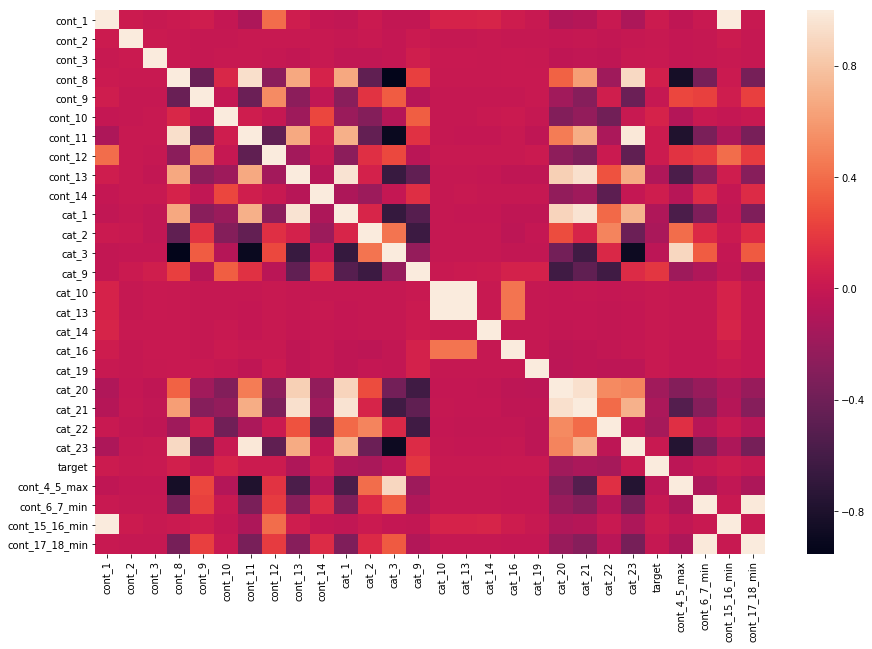

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(data=train.corr(),annot=False)
plt.show()

In [ ]:
#OHE
for i in train.columns:
    if 'cat' in i:
        temp = pd.get_dummies(pd.Series(train[i]))
        train=train.drop([i],1)
        train=pd.concat([train,temp],1)
#OHE
for i in test.columns:
    if 'cat' in i:
        temp = pd.get_dummies(pd.Series(test[i]))
        test=test.drop([i],1)
        test=pd.concat([test,temp],1)        

In [ ]:
print(train.shape,test.shape)

In [27]:
print(train.columns,test.columns)

Index(['connection_id',        'cont_1',        'cont_2',        'cont_3',
              'cont_8',        'cont_9',       'cont_10',       'cont_11',
             'cont_12',       'cont_13',
       ...
                   246,             247,             248,             249,
                   250,             251,             252,             253,
                   254,             255],
      dtype='object', length=1479) Index(['connection_id',        'cont_1',        'cont_2',        'cont_3',
              'cont_8',        'cont_9',       'cont_10',       'cont_11',
             'cont_12',       'cont_13',
       ...
                   246,             247,             248,             249,
                   250,             251,             252,             253,
                   254,             255],
      dtype='object', length=1423)


In [28]:
print(max(train['target']))

2


In [29]:
print(train.shape,test.shape)

(169307, 1479) (91166, 1423)


In [30]:
print(train.head(),test.head())

  connection_id  cont_1  cont_2  cont_3  cont_8  cont_9  cont_10  cont_11  \
0       cxcon_1       0    1032       0     1.0     0.0      0.0      1.0   
1       cxcon_4       0     520       0     1.0     0.0      0.0      1.0   
2       cxcon_7       0    1032       0     1.0     0.0      0.0      1.0   
3      cxcon_10       0    1032       0     1.0     0.0      0.0      1.0   
4      cxcon_13       0    1032       0     1.0     0.0      0.0      1.0   

   cont_12  cont_13  cont_14  target  cont_4_5_max  cont_6_7_min  \
0      0.0      1.0      0.0       2           0.0           0.0   
1      0.0      1.0      0.0       0           0.0           0.0   
2      0.0      1.0      0.0       0           0.0           0.0   
3      0.0      1.0      0.0       0           0.0           0.0   
4      0.0      1.0      0.0       2           0.0           0.0   

   cont_15_16_min  cont_17_18_min  1  2  3  1  2  3  4  5  6  7  8  9  10  11  \
0             0.0             0.0  0  0  1  0  

[5 rows x 1479 columns]   connection_id  cont_1  cont_2  cont_3  cont_8  cont_9  cont_10  cont_11  \
0       cxcon_2       0     331    6085     1.0     0.0      0.0      1.0   
1       cxcon_5       0     520       0     1.0     0.0      0.0      1.0   
2       cxcon_8       0    1032       0     1.0     0.0      0.0      1.0   
3      cxcon_11       0    1032       0     1.0     0.0      0.0      1.0   
4      cxcon_14       0    1032       0     1.0     0.0      0.0      1.0   

   cont_12  cont_13  cont_14  cont_4_5_max  cont_6_7_min  cont_15_16_min  \
0      0.0      0.0      0.0           0.0           0.0             0.0   
1      0.0      1.0      0.0           0.0           0.0             0.0   
2      0.0      1.0      0.0           0.0           0.0             0.0   
3      0.0      1.0      0.0           0.0           0.0             0.0   
4      0.0      1.0      0.0           0.0           0.0             0.0   

   cont_17_18_min  1  2  3  1  2  3  4  5  6  7  8  9  1

### Model 1 - XGB

In [36]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

/home/ab/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
feature_names = [x for x in train.columns if x not in ['connection_id','target']]
target = train['target']

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(train, target, train_size = 0.8, stratify = target, random_state = 1996)

/home/ab/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [39]:
## function for multi-accuracy
from sklearn.metrics import accuracy_score
def multAcc(pred, dtrain):
    label = dtrain.get_label()
    acc = accuracy_score(label, pred)
    return 'maccuracy', acc

In [40]:
print(train.shape)
print(len(feature_names))
print(test.shape)
print(train.columns,test.columns)

(169307, 1479)
1477
(91166, 1423)
Index(['connection_id',        'cont_1',        'cont_2',        'cont_3',
              'cont_8',        'cont_9',       'cont_10',       'cont_11',
             'cont_12',       'cont_13',
       ...
                   246,             247,             248,             249,
                   250,             251,             252,             253,
                   254,             255],
      dtype='object', length=1479) Index(['connection_id',        'cont_1',        'cont_2',        'cont_3',
              'cont_8',        'cont_9',       'cont_10',       'cont_11',
             'cont_12',       'cont_13',
       ...
                   246,             247,             248,             249,
                   250,             251,             252,             253,
                   254,             255],
      dtype='object', length=1423)


In [41]:
# default parameters
params = {}
params['objective'] = 'multi:softmax'
params['eta'] = 0.02
params['silent'] = True
params['max_depth'] = 6
params['subsample'] = 0.9
params['colsample_bytree'] = 0.9
params['nthread']=-1
params['num_class']=3

In [42]:
# default parameters
params_ = {}
params_['objective'] = 'multi:softmax'
params_['eta'] = 0.2
params_['silent'] = True
params_['max_depth'] = 10
params_['subsample'] = 0.9
params_['colsample_bytree'] = 0.9
params_['nthread']=-1
params_['num_class']=3
params['booster']='gbtree'
params['lambda']=.8
params['min_child_weight']=20
'''
{'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,
            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}
'''

"\n{'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,\n            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,\n            'eval_metric': 'rmse', 'objective': 'reg:linear'}\n"

In [ ]:
dtrain = xgb.DMatrix(data=train[feature_names], label=target)
#dtrain = xgb.DMatrix(data=X_train[feature_names], label=y_train)
dvalid = xgb.DMatrix(data=X_valid[feature_names], label=y_valid)
dtest = xgb.DMatrix(data=test[feature_names])
watchlist = [(dtrain, 'train'),(dvalid, 'eval')]

In [89]:
clf1_1 = xgb.train(params, dtrain, 350)

In [87]:
clf1_2 = xgb.train(params, dtrain, 20000, watchlist, maximize=True, verbose_eval=50, early_stopping_rounds=100, feval=multAcc)

[0]	train-maccuracy:0.778508	eval-maccuracy:0.777656
Multiple eval metrics have been passed: 'eval-maccuracy' will be used for early stopping.

Will train until eval-maccuracy hasn't improved in 100 rounds.
[50]	train-maccuracy:0.780184	eval-maccuracy:0.779812
[100]	train-maccuracy:0.780774	eval-maccuracy:0.780462
[150]	train-maccuracy:0.78121	eval-maccuracy:0.780757
[200]	train-maccuracy:0.781409	eval-maccuracy:0.780816
[250]	train-maccuracy:0.781587	eval-maccuracy:0.780846
[300]	train-maccuracy:0.781712	eval-maccuracy:0.780875
[350]	train-maccuracy:0.78183	eval-maccuracy:0.780905
Stopping. Best iteration:
[258]	train-maccuracy:0.781616	eval-maccuracy:0.780905



In [91]:
sub=pd.read_csv('test_data.csv')

In [92]:
pred = clf1_1.predict(dtest)

In [93]:
## make submission
sub['target'] = pred
sub['target'] = sub['target'].astype(int)
sub[['connection_id','target']].to_csv('XGB_06_NOV_78.0905_.01.csv', index=False)

### Model 2 - Decision Tree

In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [154]:
## set up model
clf2 = DecisionTreeClassifier(max_depth=9, min_samples_split=7)

In [155]:
clf2.fit(X_train[feature_names],y_train)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x0000026A8356E390>>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [156]:
print(accuracy_score(y_valid,clf2.predict(X_valid[feature_names])))

0.780077963499


In [42]:
## train model
clf2.fit(train[feature_names], target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [44]:
## make prediction
pred2 = clf2.predict(test[feature_names])

In [47]:
## make submission
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred2
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub2.csv', index=False)

### Model 3 - Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [50]:
clf3 = LogisticRegression(C=0.01,n_jobs=-1,solver='sag')

In [48]:
clf3.fit(X_train[feature_names],y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
clf3.fit(train[feature_names], target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
print(accuracy_score(y_valid,clf3.predict(X_valid[feature_names])))

0.731705156222


In [49]:
print(accuracy_score(y_valid,clf3.predict(X_valid[feature_names])))

0.731705156222


In [52]:
pred3 = clf3.predict(test[feature_names])

In [53]:
## make submission
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred3
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub3_Logistic.csv', index=False)

# MODEL 4 - NaiveBayes Classifier

In [96]:
from sklearn.naive_bayes import GaussianNB

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
x_tr=StandardScaler().fit_transform(X_train[feature_names])
x_ts=StandardScaler().fit_transform(X_valid[feature_names])

In [119]:
clf4=GaussianNB()

In [120]:
clf4.fit(X_train[feature_names],y_train)

GaussianNB(priors=None)

In [121]:
print(accuracy_score(y_valid,clf4.predict(X_valid[feature_names])))

0.753292776564


In [122]:
clf4.fit(train[feature_names], target)

GaussianNB(priors=None)

In [124]:
pred3 = clf4.predict(test[feature_names])

In [125]:
## make submission
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred3
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub5_NaiveBayes.csv', index=False)

# Model 5 : -    RandomForest

In [340]:
from sklearn.ensemble import RandomForestClassifier

In [483]:
clf=RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=None, min_samples_split=2,
                           min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features=None, 
                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                           bootstrap=True, oob_score=True, n_jobs=-1, random_state=1996, verbose=0,
                           warm_start=False, class_weight=None)

In [484]:
clf.fit(X_train[feature_names],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=1996, verbose=0, warm_start=False)

In [485]:
print(accuracy_score(y_valid,clf.predict(X_valid[feature_names])))

0.780402811411


In [347]:
clf.fit(train[feature_names], target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=-1,
            oob_score=True, random_state=1996, verbose=0, warm_start=False)

In [348]:
pred3 = clf.predict(test[feature_names])

In [349]:
## make submission
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred3
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub4_Random_f_2.csv', index=False)